# Monkey Pox Classification Model


### Introduction

* The Monkeypox virus (MPXV) was first discovered and reported by the Statens Serum Institut (Copenhagen, Denmark) in 1958 , after two outbreaks of the disease were discovered in cynomolgus macaques.

* The first human case of monkeypox was recorded in August 1970 from the remote town of Bokenda in the province of the equatorial of Democratic Republic of the Congo (DRC).


### Objective

This Prediction is a research analysis process on data using classification algorithms to compare the accuracy rate for each algorithm given below on this Monkey Pox data such as 
1. K-Neighbors Classifier
2. RandomForest Classifier
3. AdaBoost Classifier
4. Bagging Classifier
5. Gradient Boosting Classifier
6. Decision Tree Classifier

* The purpose of this research analysis is to find which model is suitable and from which algorithm it is best for the given dataset. 


#### Creator : Anandan Raju

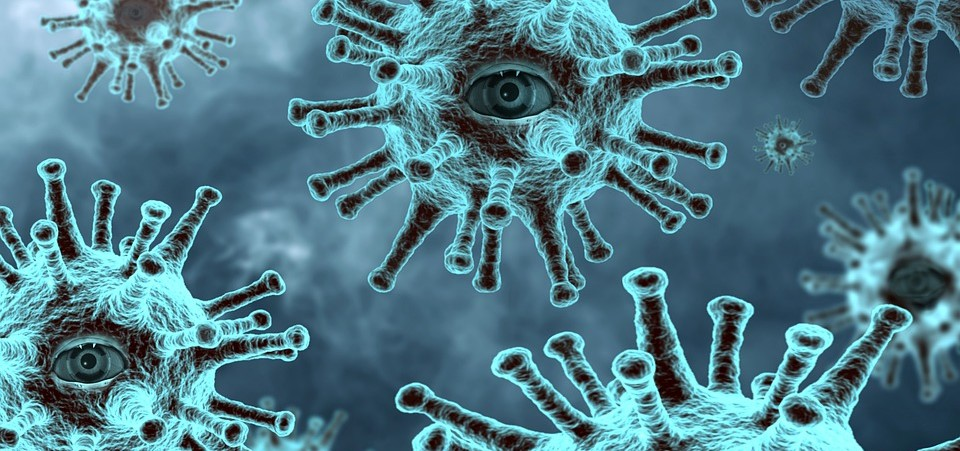

## Table Of Contents

1. Import Libraries
2. Checking Dataset
3. Data Preprocessing
4. Exploratory Data Analysis
5. Correlation Analysis
6. Train and Test Split
7. Model Output Processing
8. Model Training
9. Model Evaluation
10. Final Summary Report

# 1. Import Libraries

In [50]:
# Data Analysis Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Pre-Processing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Metric Evaluation Libriaries
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,auc,RocCurveDisplay

In [2]:
# Warnings 
import warnings
warnings.filterwarnings("ignore")

# 2. Checking Dataset

In [3]:
mpox = pd.read_csv('monkey_pox_data.csv')

In [4]:
mpox.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [5]:
mpox.shape

(25000, 11)

In [6]:
mpox.columns

Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')

#### Null and NaN Value Analysis

In [7]:
col1=[]
col2=[]
index=[]
for i in mpox.columns:
    index.append(i)
for i in mpox.isnull().sum():
    col1.append(i)
for i in mpox.isna().sum():
    col2.append(i)

col=[]
col.append(col1)
col.append(col2)

col

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [8]:
df=pd.DataFrame(col).T

In [9]:
df.columns=['Is_Null','Is_NaN']
df.index=[index]
df

,Is_Null,Is_NaN
Patient_ID,0,0
Systemic Illness,0,0
Rectal Pain,0,0
Sore Throat,0,0
Penile Oedema,0,0
Oral Lesions,0,0
Solitary Lesion,0,0
Swollen Tonsils,0,0
HIV Infection,0,0
Sexually Transmitted Infection,0,0


In [10]:
index=mpox.info()
index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                25000 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [11]:
mpox.describe()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,25000,4,2,2,2,2,2,2,2,2,2
top,P0,Fever,False,True,True,False,True,True,True,False,Positive
freq,1,6382,12655,12554,12612,12514,12527,12533,12584,12554,15909


In [12]:
pox_corr=mpox.corr()
pox_corr

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
Rectal Pain,1.000000,0.006214,0.005312,0.007747,0.001147,0.002113,0.005764,0.000666
Sore Throat,0.006214,1.000000,0.009082,-0.000795,-0.003609,-0.002011,0.000771,-0.001901
Penile Oedema,0.005312,0.009082,1.000000,0.003850,0.002781,0.000536,0.003620,-0.005722
Oral Lesions,0.007747,-0.000795,0.003850,1.000000,-0.005198,-0.007757,-0.012153,-0.002725
Solitary Lesion,0.001147,-0.003609,0.002781,-0.005198,1.000000,0.002874,-0.002335,0.009849
Swollen Tonsils,0.002113,-0.002011,0.000536,-0.007757,0.002874,1.000000,-0.004258,-0.006469
HIV Infection,0.005764,0.000771,0.003620,-0.012153,-0.002335,-0.004258,1.000000,0.001309
Sexually Transmitted Infection,0.000666,-0.001901,-0.005722,-0.002725,0.009849,-0.006469,0.001309,1.000000


#### Remove Unwanted Columns

In [13]:
mpox=mpox.drop(columns=['Patient_ID'],axis=1)

In [14]:
mpox.head(3)

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,None,False,True,True,True,False,True,False,False,Negative
1,Fever,True,False,True,True,False,False,True,False,Positive
2,Fever,False,True,True,False,False,False,True,False,Positive


# 3. Data Preprocessing

In [15]:
col_category=[column for column in mpox.columns if (mpox[column].dtype!='float64' or mpox[column].dtype!='int64')]
col_category

['Systemic Illness',
 'Rectal Pain',
 'Sore Throat',
 'Penile Oedema',
 'Oral Lesions',
 'Solitary Lesion',
 'Swollen Tonsils',
 'HIV Infection',
 'Sexually Transmitted Infection',
 'MonkeyPox']

In [16]:
encoder=LabelEncoder()
for column in col_category:
    mpox[column]=encoder.fit_transform(mpox[column])
mpox.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,2,0,1,1,1,0,1,0,0,0
1,0,1,0,1,1,0,0,1,0,1
2,0,0,1,1,0,0,0,1,0,1
3,2,1,0,0,0,1,1,1,0,1
4,3,1,1,1,0,0,1,1,0,1


In [17]:
mpox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Systemic Illness                25000 non-null  int32
 1   Rectal Pain                     25000 non-null  int64
 2   Sore Throat                     25000 non-null  int64
 3   Penile Oedema                   25000 non-null  int64
 4   Oral Lesions                    25000 non-null  int64
 5   Solitary Lesion                 25000 non-null  int64
 6   Swollen Tonsils                 25000 non-null  int64
 7   HIV Infection                   25000 non-null  int64
 8   Sexually Transmitted Infection  25000 non-null  int64
 9   MonkeyPox                       25000 non-null  int32
dtypes: int32(2), int64(8)
memory usage: 1.7 MB


# 4. Exploratory Data Analysis (EDA)

### Monkey Pox

1    15909
0     9091
Name: MonkeyPox, dtype: int64


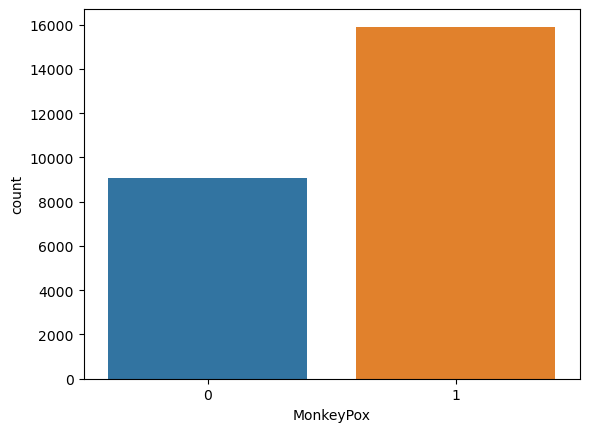

In [18]:
sns.countplot(x=mpox['MonkeyPox'])
print(mpox['MonkeyPox'].value_counts())

Systemic Illness
0    6382
3    6252
2    6216
1    6150
Name: Systemic Illness, dtype: int64


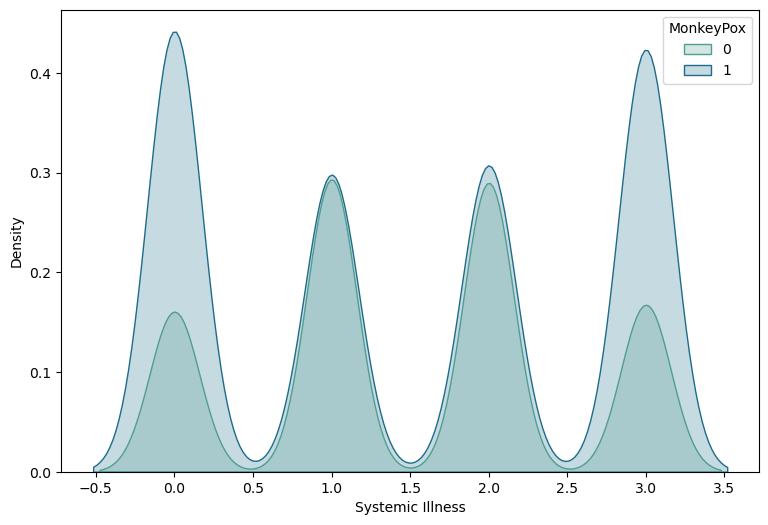

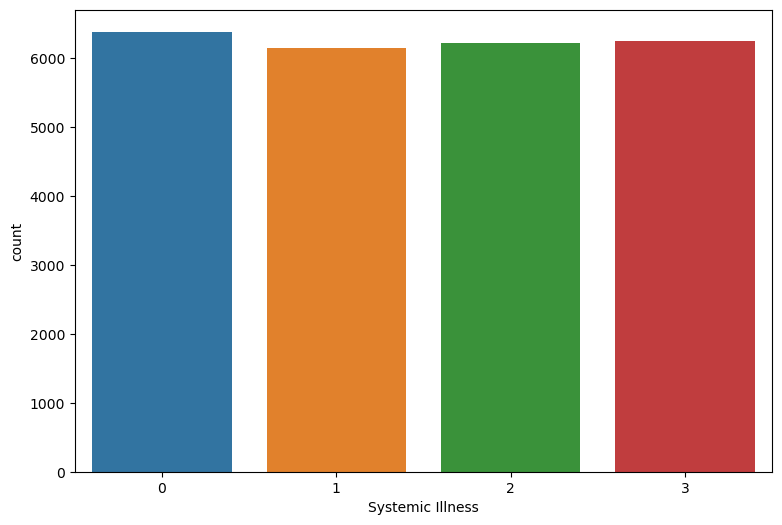

Rectal Pain
0    12655
1    12345
Name: Rectal Pain, dtype: int64


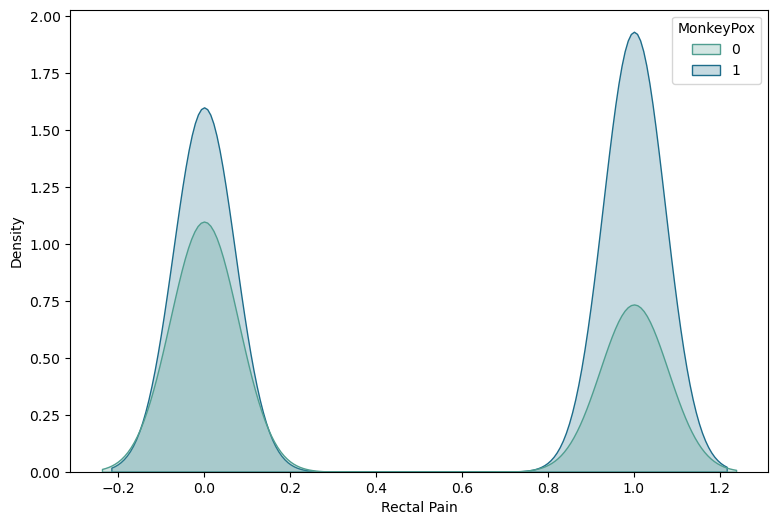

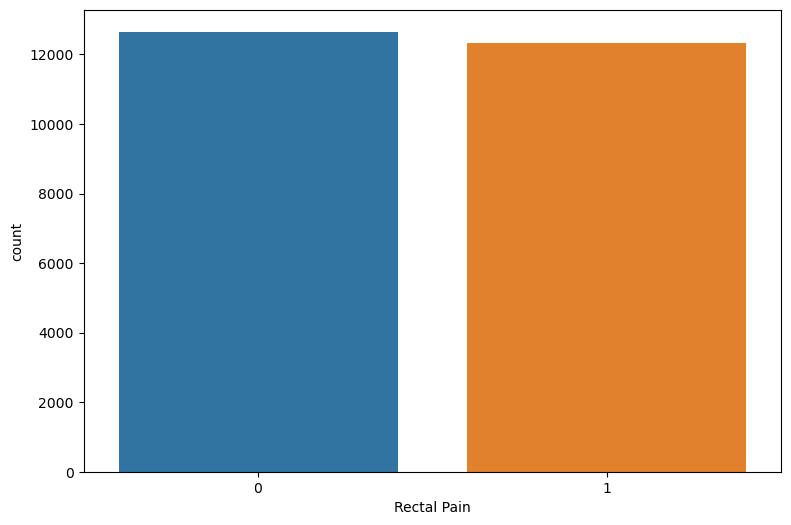

Sore Throat
1    12554
0    12446
Name: Sore Throat, dtype: int64


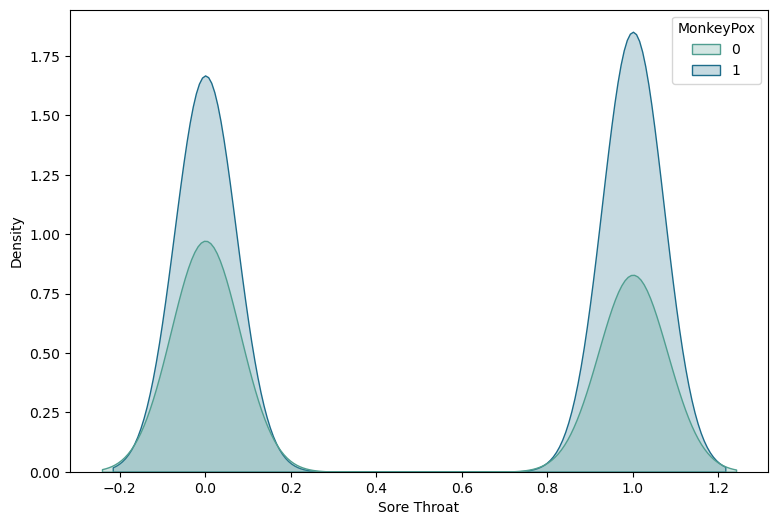

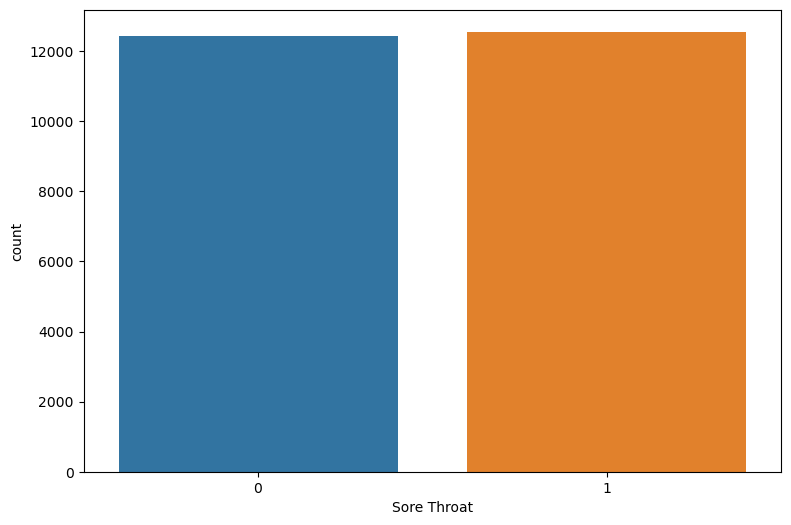

Penile Oedema
1    12612
0    12388
Name: Penile Oedema, dtype: int64


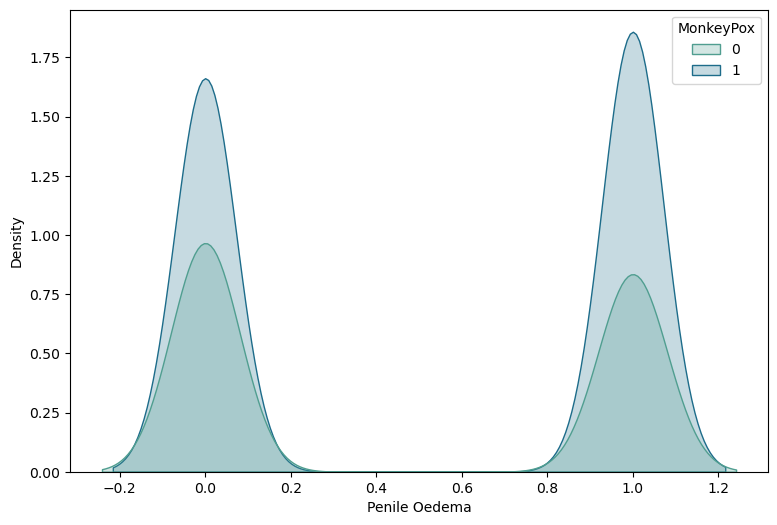

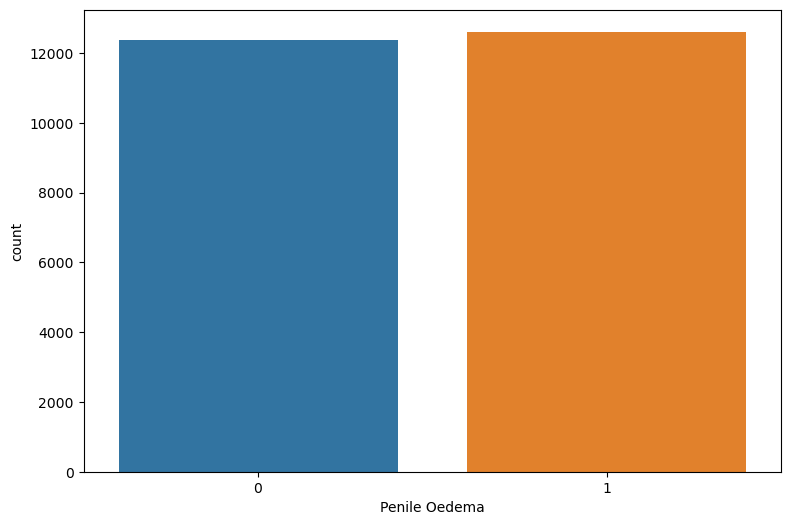

Oral Lesions
0    12514
1    12486
Name: Oral Lesions, dtype: int64


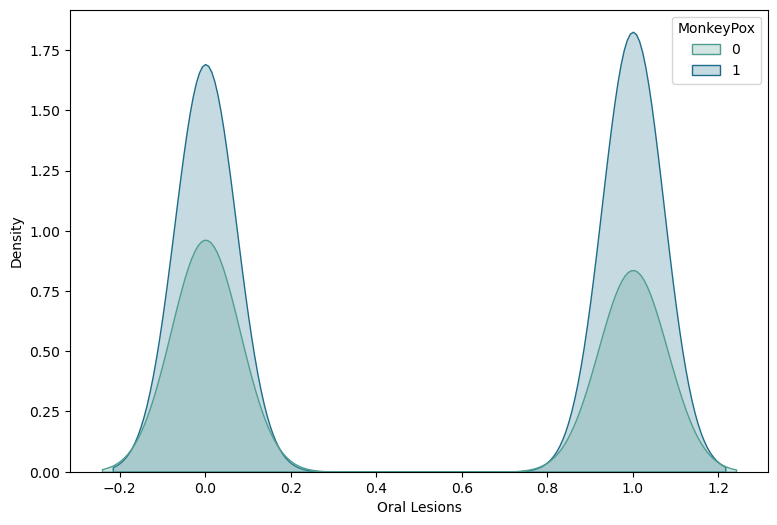

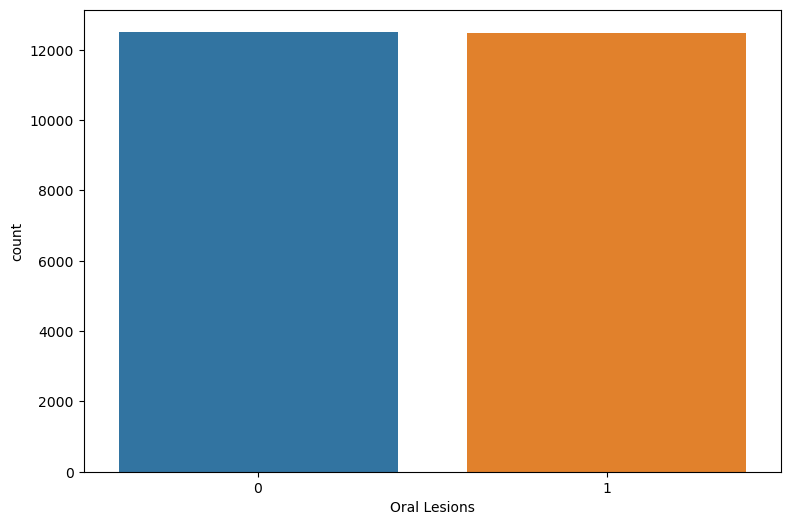

Solitary Lesion
1    12527
0    12473
Name: Solitary Lesion, dtype: int64


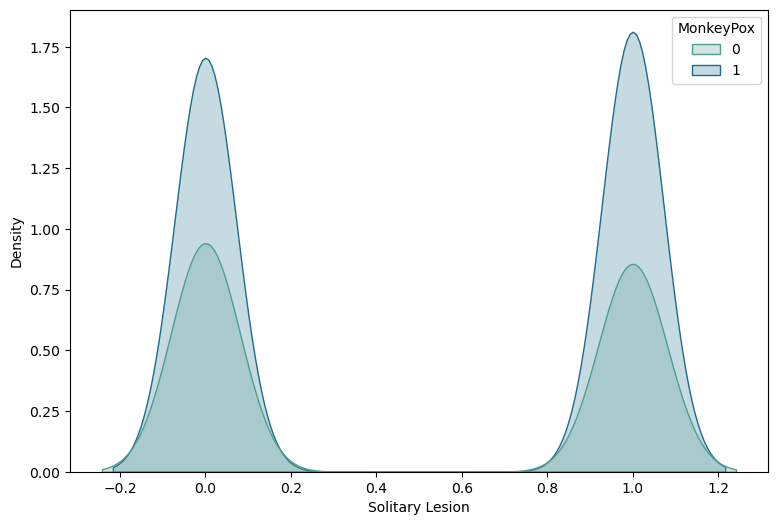

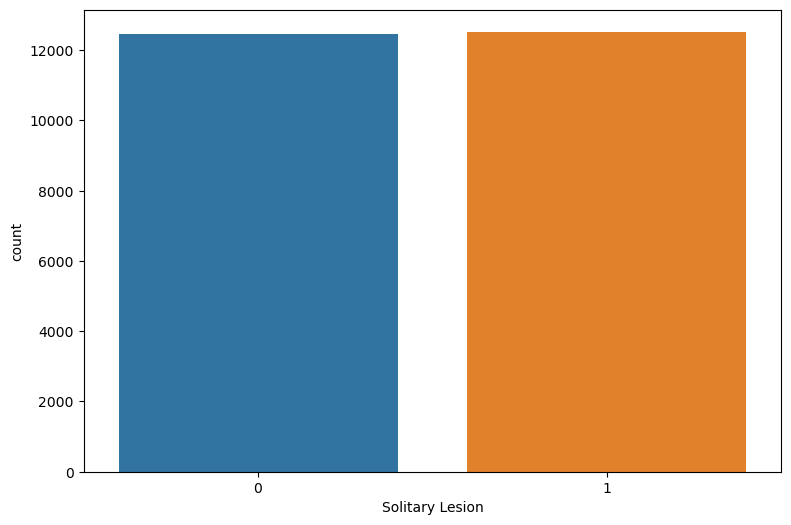

Swollen Tonsils
1    12533
0    12467
Name: Swollen Tonsils, dtype: int64


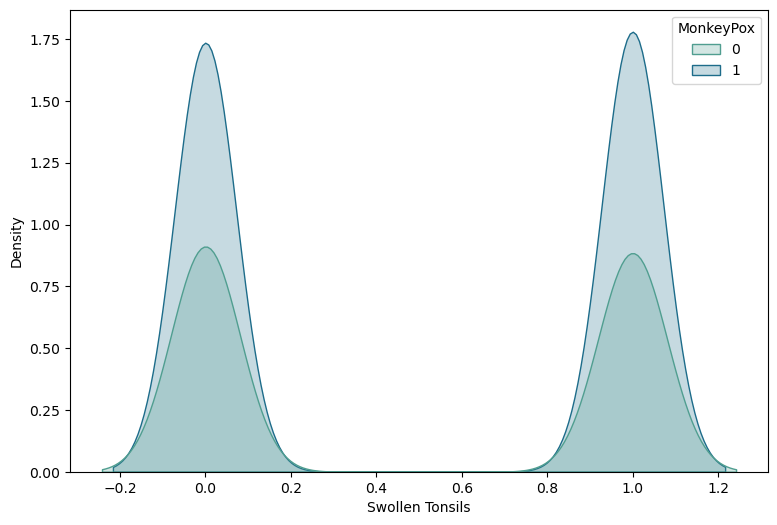

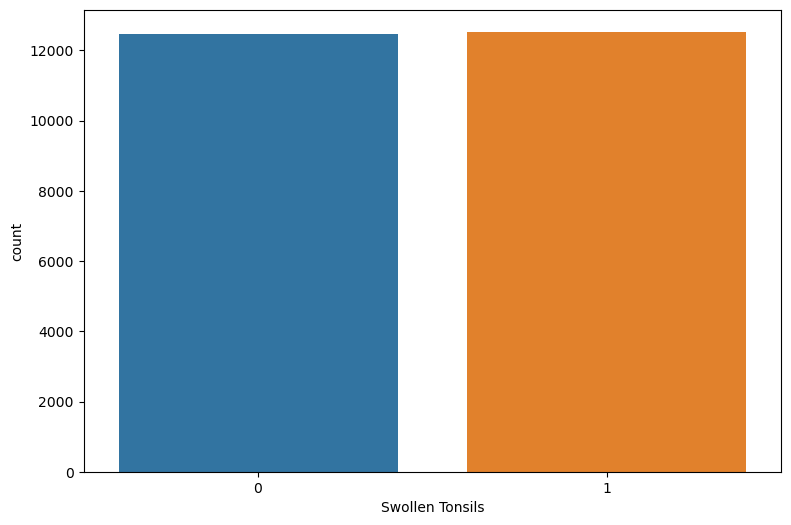

HIV Infection
1    12584
0    12416
Name: HIV Infection, dtype: int64


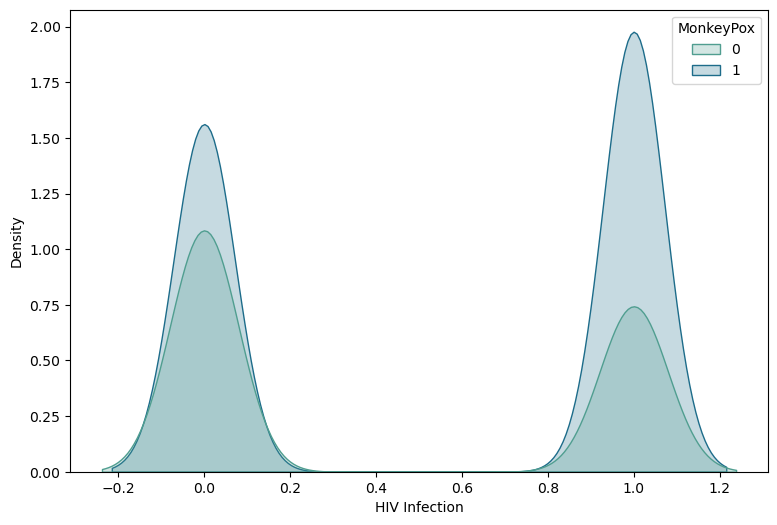

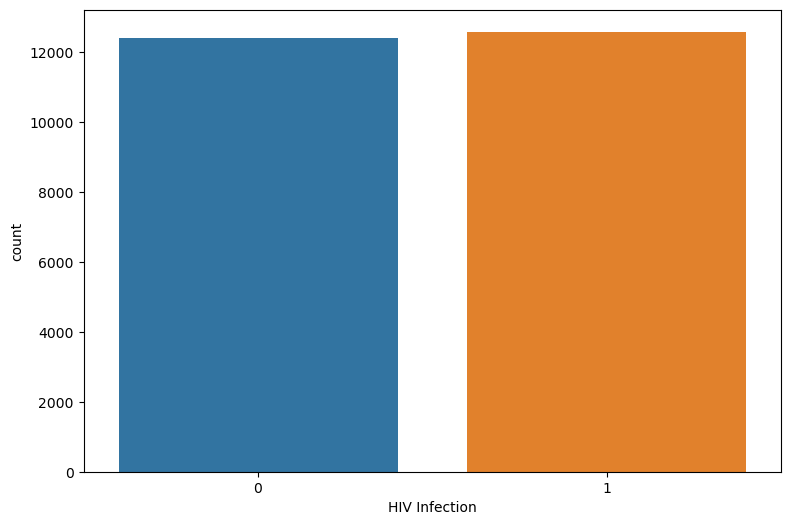

Sexually Transmitted Infection
0    12554
1    12446
Name: Sexually Transmitted Infection, dtype: int64


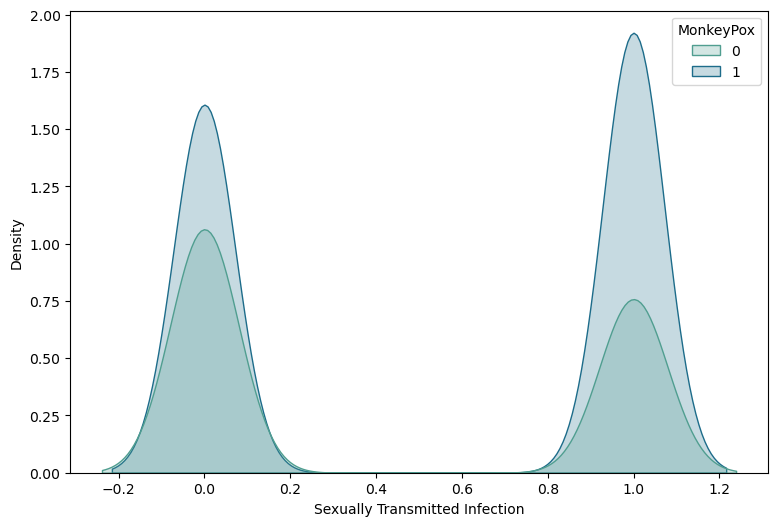

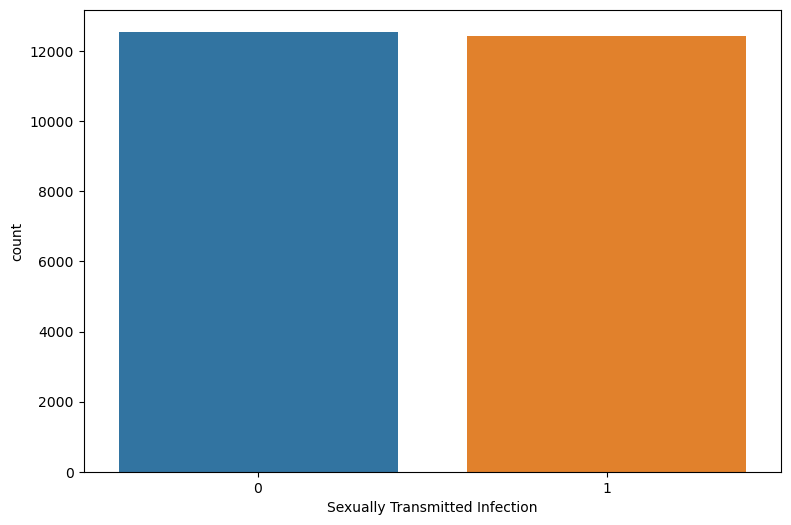

In [19]:
col_category=['Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion',
 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox']

for i in col_category:
    if i!='MonkeyPox':
        print(i)
        mpo=mpox[i].value_counts()
        print(mpo)
        plt.figure(figsize=(9,6))
        sns.kdeplot(data=mpox, x=mpox[i],hue=mpox['MonkeyPox'],palette='crest',fill=True)
        plt.show()
        plt.figure(figsize=(9,6))
        sns.countplot(x=mpox[i])
        plt.show()

### ~ Come Ups from the Plot
- From the countplot all other features are more or less equally balanced
- But Target column ('Monkey Pox) shows some variation in the countplot.
- So the kdeplot as a distribution of data with respect to target column which spread over other column data.

# 5. Correlation Analysis

In [20]:
corr=mpox.corr()
corr

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
Systemic Illness,1.000000,0.002102,-0.001614,0.006536,-0.001075,-0.012278,-0.001018,-0.004664,-0.005868,-0.010769
Rectal Pain,0.002102,1.000000,0.006214,0.005312,0.007747,0.001147,0.002113,0.005764,0.000666,0.140727
Sore Throat,-0.001614,0.006214,1.000000,0.009082,-0.000795,-0.003609,-0.002011,0.000771,-0.001901,0.063385
Penile Oedema,0.006536,0.005312,0.009082,1.000000,0.003850,0.002781,0.000536,0.003620,-0.005722,0.061905
Oral Lesions,-0.001075,0.007747,-0.000795,0.003850,1.000000,-0.005198,-0.007757,-0.012153,-0.002725,0.051955
Solitary Lesion,-0.012278,0.001147,-0.003609,0.002781,-0.005198,1.000000,0.002874,-0.002335,0.009849,0.037471
Swollen Tonsils,-0.001018,0.002113,-0.002011,0.000536,-0.007757,0.002874,1.000000,-0.004258,-0.006469,0.013221
HIV Infection,-0.004664,0.005764,0.000771,0.003620,-0.012153,-0.002335,-0.004258,1.000000,0.001309,0.146192
Sexually Transmitted Infection,-0.005868,0.000666,-0.001901,-0.005722,-0.002725,0.009849,-0.006469,0.001309,1.000000,0.123376
MonkeyPox,-0.010769,0.140727,0.063385,0.061905,0.051955,0.037471,0.013221,0.146192,0.123376,1.000000


<AxesSubplot:>

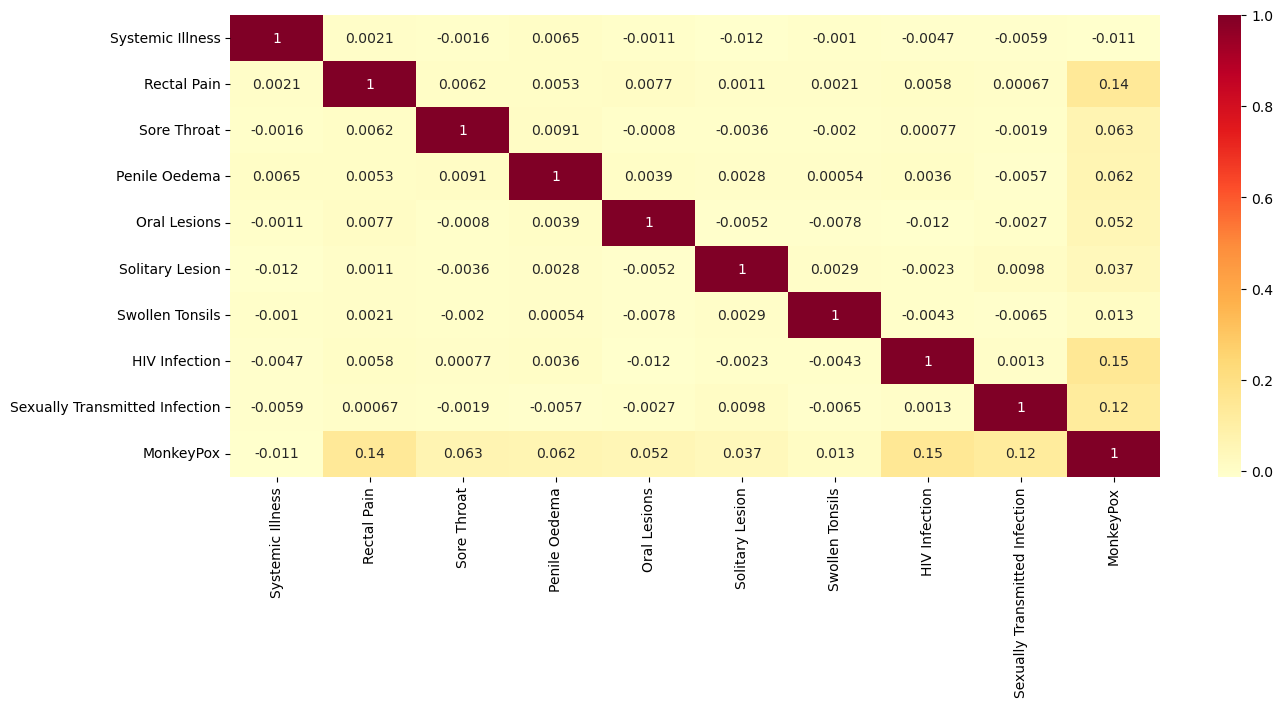

In [21]:
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,cmap='YlOrRd')

#### ~ Come Ups

* No features are correlated significantly
* Weak Correlation exist between HIV Infection & Sexually Transmitted Infection features from this Heat Map.

# 6. Train and Test Data Split

In [22]:
x_train=mpox.drop(columns=['MonkeyPox'])
y_train=mpox['MonkeyPox']

x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.20)

In [23]:
print('Train Dataset Shape :',x_train.shape[0])
print('Test Dataset Shape :',y_train.shape[0])

Train Dataset Shape : 20000
Test Dataset Shape : 20000


# 7. Model Output Processing

In [55]:
def conf_matrix(algo,model):
    print(algo)
    plt.figure(figsize=(8,5))
    pred=model.predict(x_test)
    cm=confusion_matrix(y_test,pred)
    ax=plt.subplot()
    sns.heatmap(cm,annot=True,cmap='YlOrRd')
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Label')
    plt.show()

In [46]:
def classify_report(algo,model):
    print(algo+' Report :')
    pred=model.predict(x_test)
    print(classification_report(y_test,pred))

In [51]:
def p_roc_curve(algo,model):
    print(algo)
    y_pred_proba=model.predict_proba(x_test)[::,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
    roc_auc=auc(fpr,tpr)
    curve=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
    curve.plot()
    plt.show()

# 8. Model Training

In [26]:
algorithm = [('KNN Classifier', KNeighborsClassifier()), 
              ('Random Forest Classifier', RandomForestClassifier()),
              ('Bagging Classifier', BaggingClassifier()),
              ('Adaboost Classifier', AdaBoostClassifier()), 
              ('Gradientboot Classifier',GradientBoostingClassifier()),
              ('Decision Tree Classifier', DecisionTreeClassifier())
             ]

trained_models=[]
model_score={}

for index,ml in enumerate(algorithm):
    model=ml[1]
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    model_score[ml[0]] = str(model.score(x_train,y_train)*100)+'%'
    trained_models.append((ml[0],model))

# 9. Model Evaluation

In [28]:
for key in model_score:
    print(key,'=',model_score[key])

KNN Classifier = 67.435%
Random Forest Classifier = 70.69%
Bagging Classifier = 70.49499999999999%
Adaboost Classifier = 69.02000000000001%
Gradientboot Classifier = 69.21000000000001%
Decision Tree Classifier = 70.69%


KNN Classifier


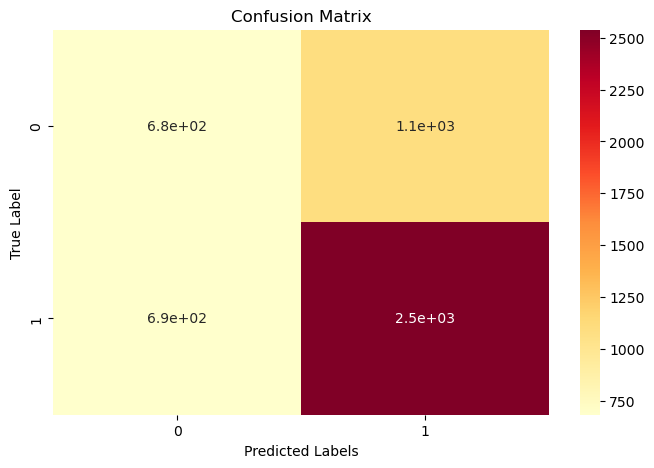

Random Forest Classifier


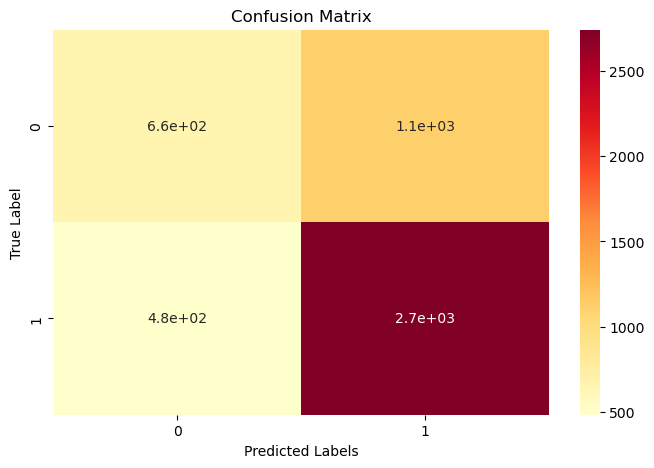

Bagging Classifier


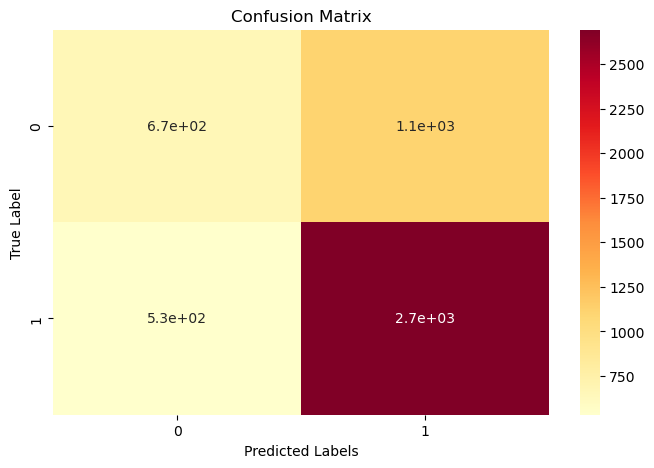

Adaboost Classifier


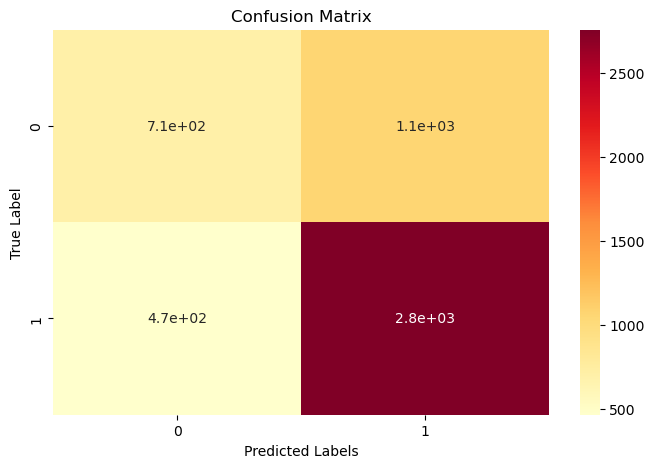

Gradientboot Classifier


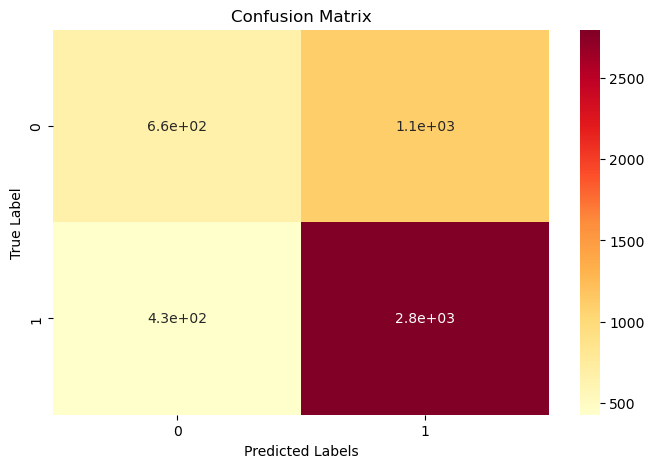

Decision Tree Classifier


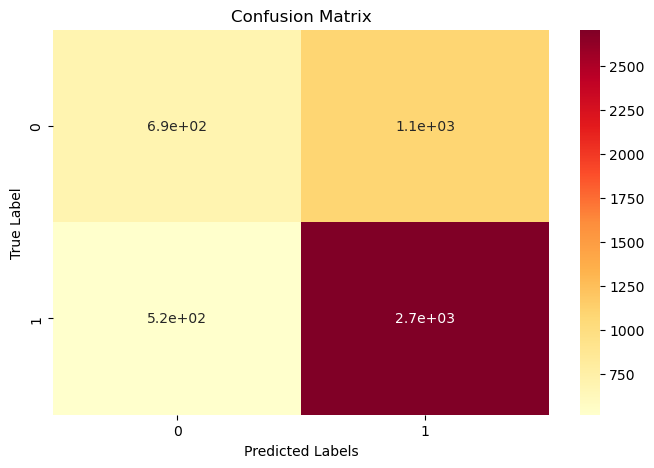

In [56]:
for index,ml in enumerate(trained_models):
    conf_matrix(ml[0],ml[1])

In [30]:
for index,ml in enumerate(trained_models):
    classify_report(ml[0],ml[1])
    print('\n')

KNN Classifier Report :
              precision    recall  f1-score   support

           0       0.50      0.39      0.43      1775
           1       0.70      0.79      0.74      3225

    accuracy                           0.64      5000
   macro avg       0.60      0.59      0.59      5000
weighted avg       0.63      0.64      0.63      5000



Random Forest Classifier Report :
              precision    recall  f1-score   support

           0       0.58      0.37      0.45      1775
           1       0.71      0.85      0.77      3225

    accuracy                           0.68      5000
   macro avg       0.65      0.61      0.61      5000
weighted avg       0.66      0.68      0.66      5000



Bagging Classifier Report :
              precision    recall  f1-score   support

           0       0.56      0.38      0.45      1775
           1       0.71      0.83      0.77      3225

    accuracy                           0.67      5000
   macro avg       0.63      0.60     

KNN Classifier


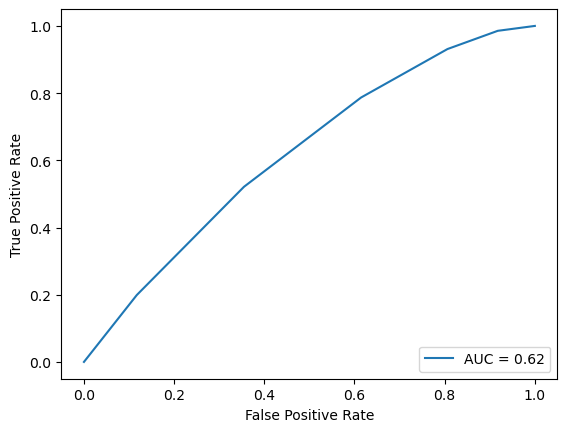

Random Forest Classifier


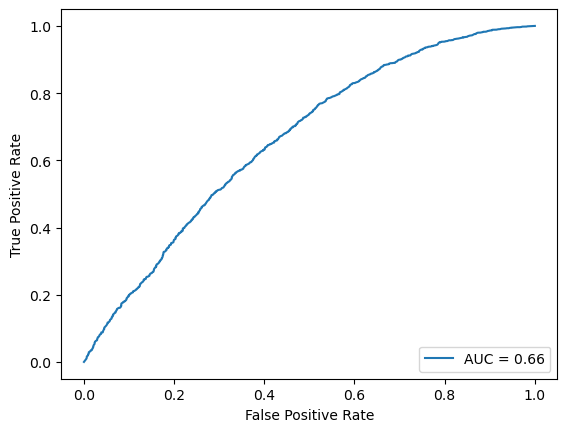

Bagging Classifier


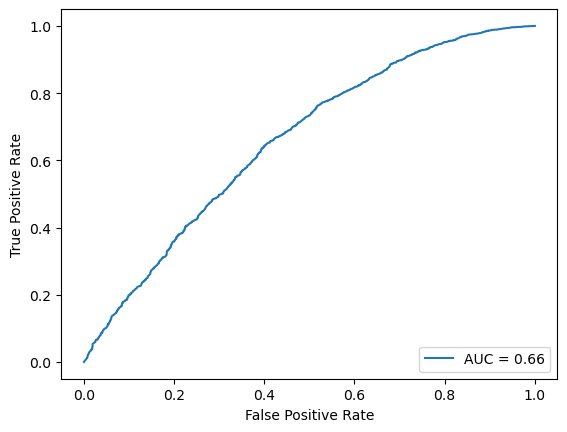

Adaboost Classifier


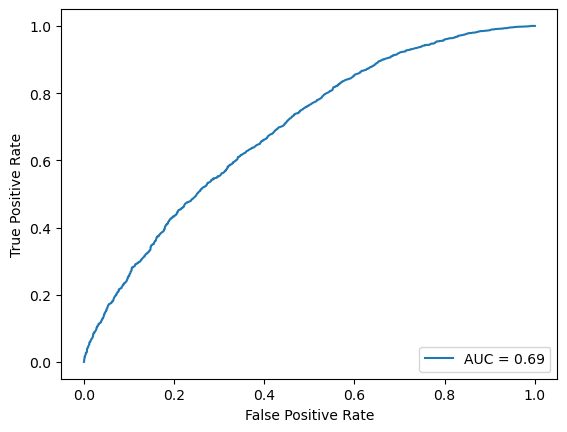

Gradientboot Classifier


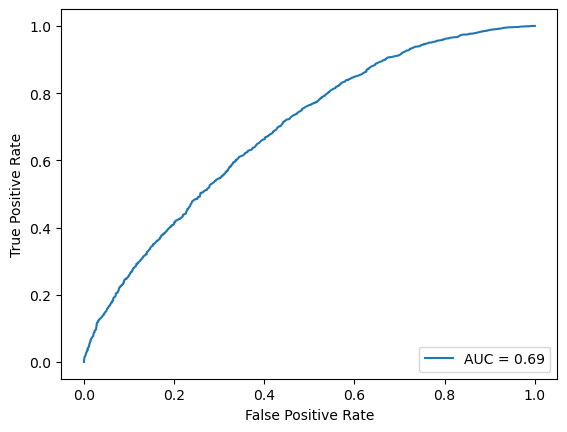

Decision Tree Classifier


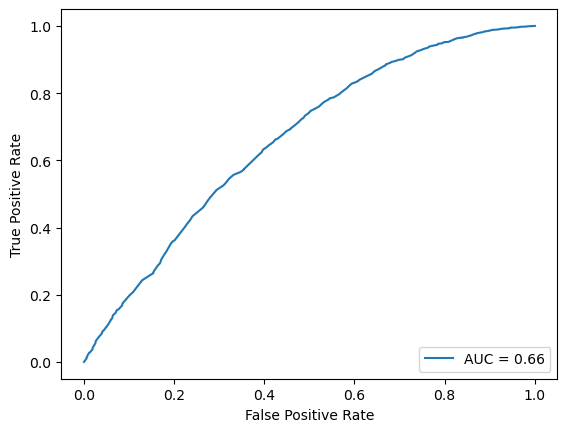

In [52]:
for index,ml in enumerate(trained_models):
    p_roc_curve(ml[0],ml[1])

# 10. Final Summary Report
* So from these 6 algorithms applied the training output shows 
    
    1. Random Forest Classifier = 70.69%
    2. Bagging Classifier = 70.49499999999999%
    3. Decision Tree Classifier = 70.69%
    
    
* From AUC Score and Graph Curve of all the algorithms are approximately same
* Classification Report of "RandomForest" has best presicion and recall score

### So from this we can pick Random Forest as the Best Fit for this Analysis.